In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import shap
import joblib
import json


# Load dataset

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9


In [ ]:
# Separate numeric and binary features

def split_features(df, target_column):
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != target_column]
    # Check for binary columns (0 or 1)
    binary_cols = [c for c in numeric_cols if df[c].dropna().isin([0,1]).all()]
    numeric_cols_clean = [c for c in numeric_cols if c not in binary_cols]
    return numeric_cols_clean, binary_cols

num_features, binary_features = split_features(df, 'EventCKD35')
cat_features = [c for c in binary_features if c != 'EventCKD35']


# EDA

print("Dataset shape:", df.shape)
print(df.describe())



Dataset shape: (491, 22)
              Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
count  491.000000   491.000000       491.000000  491.000000       491.000000   
mean     0.509165    53.203666         0.437882    0.091650         0.059063   
std      0.500426    13.821282         0.496632    0.288825         0.235983   
min      0.000000    23.000000         0.000000    0.000000         0.000000   
25%      0.000000    44.000000         0.000000    0.000000         0.000000   
50%      1.000000    54.000000         0.000000    0.000000         0.000000   
75%      1.000000    64.000000         1.000000    0.000000         0.000000   
max      1.000000    89.000000         1.000000    1.000000         1.000000   

       HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity     DLDmeds  \
count      491.000000   491.000000  491.000000      491.000000  491.000000   
mean         0.152749     0.682281    0.645621        0.505092    0.551935   
std          0.36011

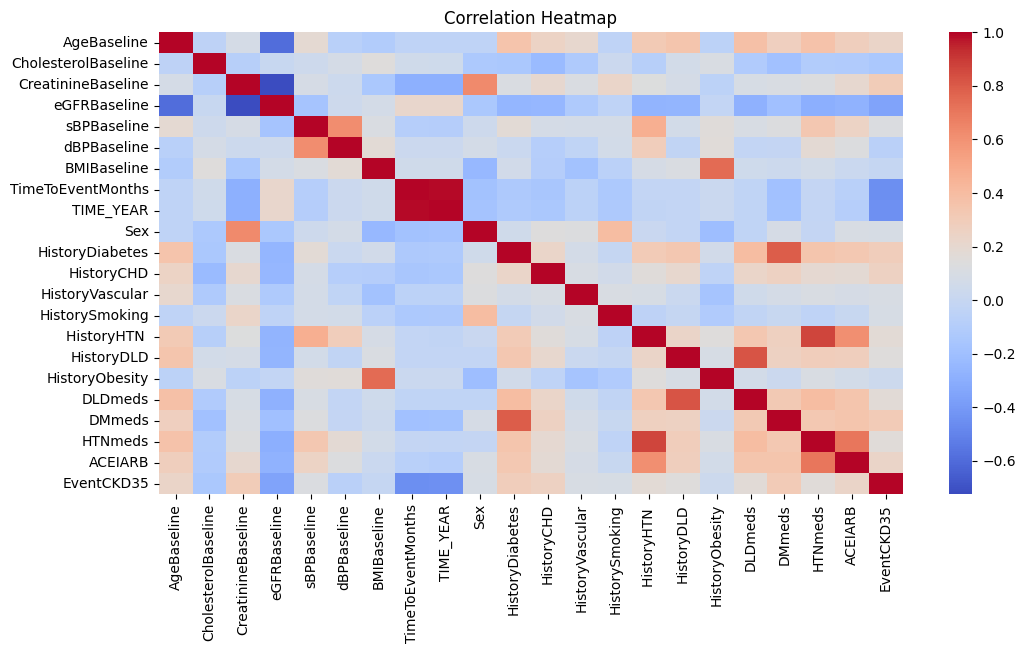

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_features + cat_features + ['EventCKD35']].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation.png", dpi=300, bbox_inches='tight')
plt.show()

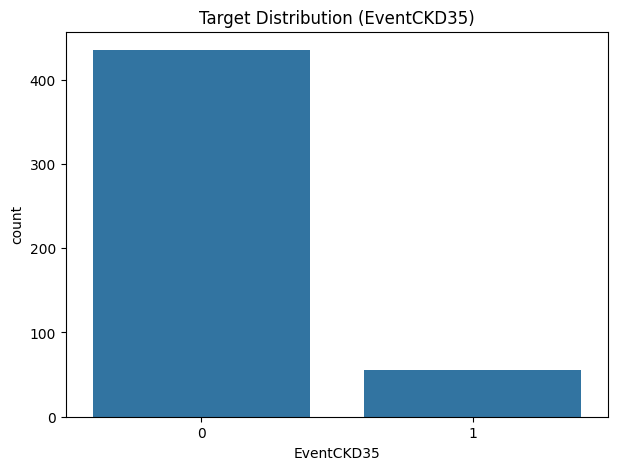

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='EventCKD35')
plt.title("Target Distribution (EventCKD35)")
plt.show()
